### 1) Give three reasons why water vapor is important for weather and climate. 
1. Water vapor is necessary for precipitation to occur. Put simply, water becomes water vapor (the gaseous form) with heat, which is able to rise until it condenses and then falls back to Earth as precipitation. This has implications for the water cycle, since precipitation provides water to regions not near any fixed bodies of water since clouds can move.
2. Water vapor is also an important factor in the rate at which water evaporates. As demonstrated in our evaporation/evapotranspiration formulas, it is easier for water to evaporate in dry environments (less relative humidity) than moist environments (high relative humidity)
3. As mentioned before, water vapor forms clouds. Aside from precipitation, clouds affect weather by reflecting incoming solar radiation/sunlight. This definitely affects temperature and climate

### 2) Define the following terms:
- **Specific humidity**: the specific mass of water vapor in a specific mass of air
- **Mixing ratio of water vapor**: the amount of water vapor in dry air in terms of a ratio. This is very similar to the specific humidity, but is moreso concerned about the ratio, rather than the amount.
- **Transpiration**: the process through which plants lose water (as water vapor) through special pores called stomata. 
- **What factors influence the land evapotranspiration rate?** Answer: Factors that influence the land evapotranspiration rate include incoming radiation, temperature, relative humidity, wind, soil mosture availability, and what kind of plants are in the region.
- **What factors influence evaporation over the ocean?** Answer: Evaporation over the ocean is influenced by many factors, some of which include the air density, wind velocity, the saturation specific humidity at the sea surface temperature, the specific humidity 10m above the surface, and the coefficient of eddy diffusivity (how rough the ocean can get). Of course, there are other factors at play that are not listed here.


### 3) Clausius-Clapeyron

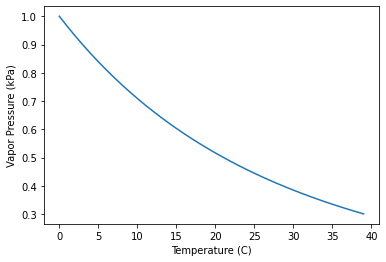

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This function calculates the vapor pressure of water at a given temperature, using the Clausius-Clapeyron equation.
# The equation is as follows: e = 0.611 ** ((17.502 * T) / (240.97 + T))
# Where e is the vapor pressure in kPa, and T is the temperature in degrees Celsius.
def clausius_clapeyron(T): 
    return 0.611 ** ((17.502 * T) / (240.97 + T))

# This function plots a the vapor pressure along a range of temperatures
# Temperatures should be in degrees Celcius
def plot_range(start, end):
    temperatures = np.arange(start, end, 1)
    vapor_pressures = [clausius_clapeyron(t) for t in temperatures]

    plt.plot(temperatures, vapor_pressures)
    plt.xlabel("Temperature (C)")
    plt.ylabel("Vapor Pressure (kPa)")
    plt.show()

plot_range(0, 40)

In [14]:
# calculates vapor pressure
pressure_in = 0.611 ** ((17.502 * 20) / (240.97 + 20))
pressure_out = 0.611 ** ((17.502 * 0) / (240.97 + 0))

print(f'The indoors vapor pressure at 20 degrees C is about {pressure_in} kPa')
print(f'The outdoors vapor pressure at 20 degrees C is about {pressure_out} kPa')
print(f'The relative humidity indoors is about {(pressure_in / pressure_out) * 100}%')

The indoors vapor pressure at 20 degrees C is about 0.5164357583266086 kPa
The outdoors vapor pressure at 20 degrees C is about 1.0 kPa
The relative humidity indoors is about 51.64357583266086%


Not sure how to do part C

### 4) Latent Heat
1. For one square meter with a depth of 1 meter, we know that we have 1 $m^3$ of water, which is equal to 1000 kg in mass. Therefore, we can calculate the energy required, x, as $x = 1000 kg * (2.5 * 10^6 J/kg) = 2.5 * 10^9 J$
<br>
Therefore, one would need $2.5 * 10^9 J$ to evaporate one cubic meter of swamp water.
2. To calculate the rate of energy, we must use the equation rate = required energy / time (in seconds). Therefore, let us calculate, assuming 31,536,000 seconds in a year. Therefore, when r is rate, $r = 2.5 * 10^9 J / 31,536,000 s = 79.4 J/s/m^2 = 79.4 W/m^2$. Therefore, the rate is $79.4 W/m^2$
3. $\frac{79.4 W/m^2}{342 W/m^2}$, which simplifies to $\approx 0.23 W/m^2$

### 5) Evaporation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr   # to read netcdf files
import pandas as pd
import cartopy.crs as ccrs  # to add maps

# Returns the name of a month, given its integer value
def get_month(month_int):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return months[month_int]

# Reads evaporation data from NOAA database, returns the dataset
def read_evaporation_file():
    file_loc="https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/gaussian_grid/"
    file1="lhtfl.sfc.mon.ltm.nc"
    ds1 = xr.open_dataset(file_loc+file1)

    # convert time to datetime64
    ds1["time"] = ds1["time"].astype("datetime64[ns]")
    print(ds1)
    return ds1

# Plots a prettier evaporation map with a cartographic overlay
def mapped_evaporation(month_int):
    ds1 = read_evaporation_file()

    cmap1=plt.cm.gist_earth_r     # color table
    lev1=np.arange(-10,255,5)
    proj = ccrs.PlateCarree()

    fig = plt.figure(figsize=(9,5))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    (ds1.lhtfl).isel(time=month_int).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
    ax.coastlines()
    month = get_month(month_int)  
    plt.title(f"{month} surface latent heat flux (W/m2)")
    plt.savefig(f'homework1/generated/mapped-evap-{month}.png')
    plt.show()

# Generates plots for January and July. Note - mapped evaporation is a bit slow
mapped_evaporation(0)
mapped_evaporation(6)

# Note: this code does not run in my Jupyter Notebook, so I ran it in python and pasted the generated image into notebook

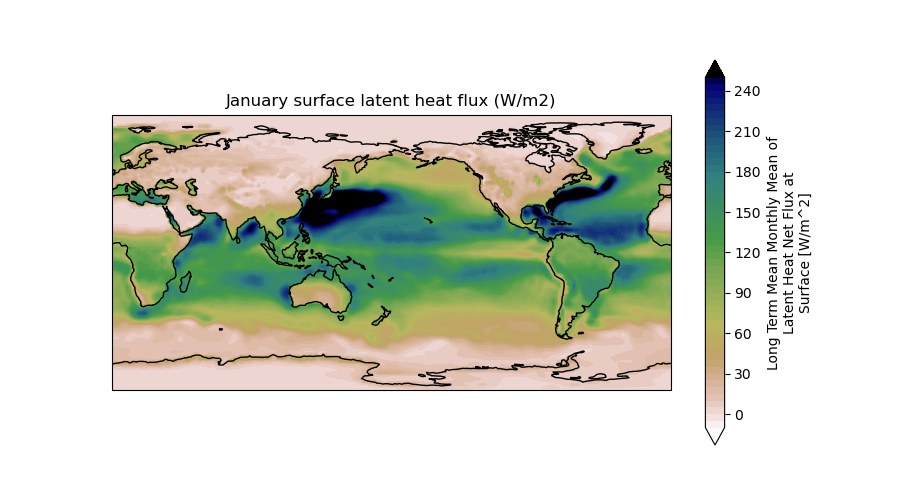

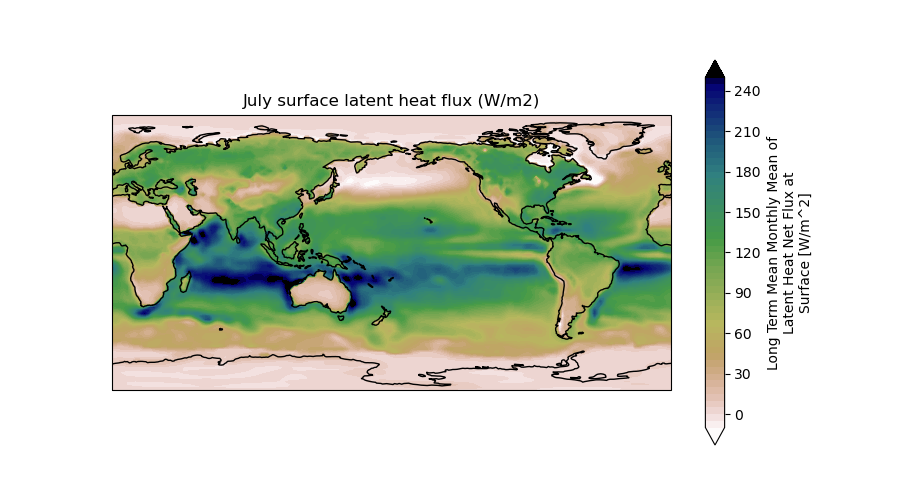

Latent heat flux is one way of measuring evaporation. Since we are concerned with evapotranspiration, let us focus on the regions of our plots over land, since that is where evapotranspiration occurs. On a cursory inspection, one will notice that, in the Northern hemisphere, there appears to be much more evapotransiration in July than in January. Indeed, in Europe, North America, and much of Asia, there is very little signifigant evapotranspiration in January. This is likely because winter in the Northern Hemisphere means colder temperatures, less incoming radiation, etc. Come July, warming temperatures and more incoming radiation means more evapotranspiration can occur in these months.

On the contrary, in the Southern Hemisphere, there is more year-round evapotranspiration, likely because it generally receives more sunlight year-round. However, in South America and Africa especially, there seems to be more evapotranspiration in the Winter months, since this is when it is hotter.